<a href="https://colab.research.google.com/github/JupiterIvy/rna_2025_2/blob/validation_section/CarlaSamira_RNA_2025_2_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade Avaliativa 2.1 - Aprendizado Supervisionado no Neurônio Perceptron

- Redes Neurais Artificiais 2025.2
- Profa. Elloá B. Guedes (ebgcosta@uea.edu.br)
- http://github.com/elloa

### Equipe

- Carla Lapa - 2213510004 ([github.com/carlapanog](https://github.com/carlapanog))
- Evelyn Bessa - 2213510007 ([github.com/JupiterIvy](https://github.com/JupiterIvy))
- Nezi Pimentel - 2213510058 ([github.com/nezi404](https://github.com/nezi404))
- Samira Souza - 2213510027 ([github.com/samirasousza](https://github.com/samirasousza))
- Sandra Valcacer - 2213510045 ([github.com/belavalcacer](https://github.com/belavalcacer))


#### ID dos exemplos da atividade




In [ ]:
print(f" ID = {(4 + 7 + 8 + 7 + 5) % 4}")

 ID = 3


### Detalhamento da Atividade

A atividade será dividida em três partes, cada uma a ser apresentada a seguir. Todas as atividades tem como entrada um arquivo txt com conteúdo em binário descrevendo um numpy.ndarray salvo previamente contendo múltiplos exemplos de dimensões (1,3), ou seja, tem dimensões (m,1,3), em que m varia a depender do documento considerado, de 800 a 1000, em média. Cada exemplo representa um ponto no $R^2$ e o seu respectivo rótulo, isto é, tem-se (x1,x2,yd). Os valores de yd correspondem às classes discretas e binárias 0 e 1, em que a classe 0 deve ser denotada na cor vermelha e a classe 1 deve ser denotada na cor azul.

### Parte I – Resolvendo um Problema Linearmente Separável

Nesta parte, todas as equipes devem usar o arquivo dataAll.txt e construir o algoritmo de treinamento do neurônio perceptron para resolver o problema de classificação proposto. Alguns aspectos devem ser considerados:
1. As equipes devem utilizar a função de ativação degrau com θ = 0;
2. O valor da taxa de aprendizado deve ser igual a η = 0,1;
3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo;
4. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os exemplos presentes no conjunto de treinamento;
5. Ao final, deve-se imprimir:
(a) O número total de ajustes no vetor de pesos;
(b) O número de épocas até a convergência;
(c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:

    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        self.total_updates = 0
        self.epochs = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.random.uniform(-0.5, 0.5, n_features)
        self.bias = np.random.uniform(-0.5, 0.5)

        print("Pesos iniciais:", self.weights, "Bias inicial:", self.bias)

        while True:
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y[idx] - y_predicted)

                if update != 0:  # Houve ajuste
                    self.weights += update * x_i
                    self.bias += update
                    self.total_updates += 1
                    errors += 1

            self.epochs += 1
            if errors == 0:  # convergência
                break

        print(f"Total de ajustes: {self.total_updates}")
        print(f"Épocas até convergência: {self.epochs}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

In [ ]:
data = np.fromfile("dataAll.txt", dtype=np.float64)
data = data.reshape(-1, 3)

X = data[:, :2]  # x1, x2
y = data[:, 2].astype(int)  # label

p = Perceptron(learning_rate=0.1)
p.fit(X, y)

plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", label="Classe 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", label="Classe 1")

x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = -(p.weights[0] * x1_vals + p.bias) / p.weights[1]
plt.plot(x1_vals, x2_vals, color="green", linewidth=2, label="Fronteira de decisão")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Classificação com Perceptron")
plt.show()

### Parte II – Experimentação

Nesta segunda parte, cada equipe deverá usar o seu respectivo identificador de exemplos para trabalhar com um arquivo específico. Por exemplo, se a equipe tem identificador 3, deve considerar o arquivo data3.txt.
A equipe deve aproveitar o algoritmo construído na Parte I e executar 10 repetições do mesmo para as seguintes configurações:
$$η×I = {0.4, 0.1, 0.01}× {(−100,+ 100),(−0.5,+ 0.5)}$$

em que I é o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos. Assim, há 6 configurações a serem testadas, cada uma delas por 10 repetições.
Para cada configuração em suas 10 execuções, obter a média e o desvio padrão da quantidade de ajustes efetuados no vetor de pesos e o menor número de épocas até a convergência nestas 10 repetições. Dispor tais resultados sobre a forma de uma tabela e discutir se há uma configuração melhor ou pior que as demais ou se elas são equivalentes. Uma estrutura para esta tabela é sugerida a seguir, a qual foi preenchida com dados fictícios. Recomenda-se a utilização do pacote prettytable no notebook.

In [ ]:
import numpy as np

data3 = np.fromfile("data3.txt", dtype=float)
data3

### Parte III – Validação Holdout em Problema Não-Linearmente Separável
- Todas as equipes devem considerar o arquivo dataHoldout.txt e apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.

- Em seguida, os exemplos devem ser aleatoriamente divididos em duas partições, uma delas contendo 70% dos exemplos (treinamento) e outra contendo 30% (teste).
A semente de aleatoriedade deve ser igual ao identificador da equipe (3).
- Embora o problema não seja linearmente separável, vamos utilizar os dados de treinamento para obter uma reta de separação das classes com o neurônio Perceptron (solução possível). O neurônio em questão tem função de ativação degrau com θ = 0, os valores de η e de inicialização de pesos devem seguir as recomendações da literatura e os pesos do neurônio devem ser aleatoriamente escolhidos a partir de U(−0,5, + 0,5).

- Execute o algoritmo por 100 épocas, mas a cada época apresente os exemplos disponíveis com conjunto de treinamento em
ordem aleatória.


Efetue a previsão da saída deste neurônio para todos os exemplos do conjunto de teste, comparando-a com a saída desejada e responda ao que se pede:

1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;
2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente
fornecido?
3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score.
Para estes cálculos, está liberada a utilização de sklearn.metrics;
4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de
testes.

- Apresente dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Disponha tais gráficos lado a lado.

resolucao a partir daq

- Considerar o arquivo dataHoldout.txt e apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

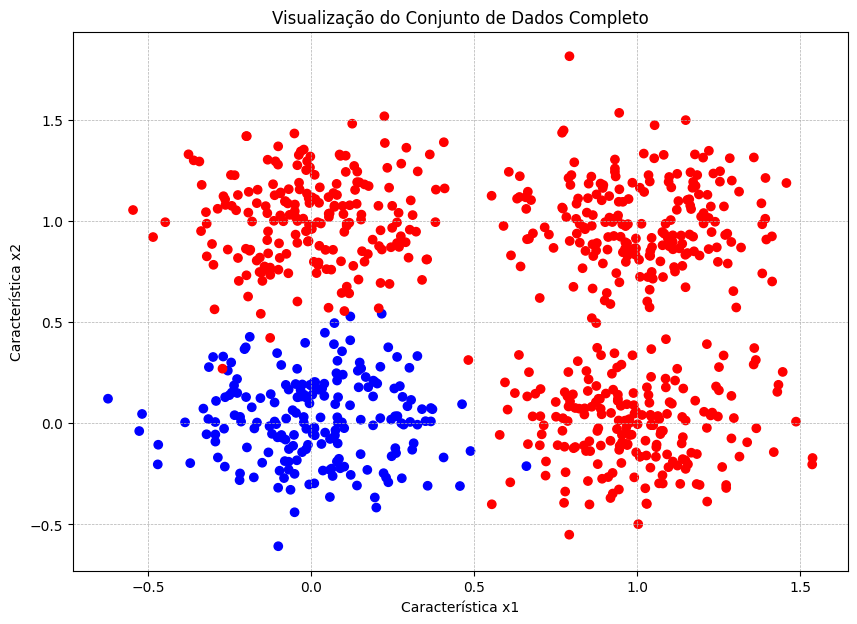

In [ ]:
data = np.fromfile('dataHoldout.txt', dtype=np.float64).reshape(-1, 3)
X_full = data[:, :2]
y_full = data[:, 2]

colors = ['red' if label == 0 else 'blue' for label in y_full]

plt.figure(figsize=(10, 7))
plt.scatter(X_full[:, 0], X_full[:, 1], c=colors)
plt.title('Visualização do Conjunto de Dados Completo')
plt.xlabel('Característica x1')
plt.ylabel('Característica x2')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Não é possível traçar uma única linha reta que consiga dividir perfeitamente os pontos da classe 0 (vermelho) dos da classe 1 (azul).

- Em seguida, os exemplos devem ser aleatoriamente divididos em duas partições, uma delas contendo 70% dos exemplos (treinamento) e outra contendo 30% (teste).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=3)

- A semente de aleatoriedade deve ser igual ao identificador da equipe (3). Embora o problema não seja linearmente separável, vamos utilizar os dados de treinamento para obter uma reta de separação das classes com o neurônio Perceptron (solução possível). O neurônio em questão tem função de ativação degrau com θ = 0, os valores de η e de inicialização de pesos devem seguir as recomendações da literatura e os pesos do neurônio devem ser aleatoriamente escolhidos a partir de U(−0,5, + 0,5).

In [ ]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=100):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        np.random.seed(3)
        self.weights = np.random.uniform(-0.5, 0.5, 1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            indices = np.random.permutation(len(y))
            X_shuffled, y_shuffled = X[indices], y[indices]

            for xi, target in zip(X_shuffled, y_shuffled):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


- Execute o algoritmo por 100 épocas, mas a cada época apresente os exemplos disponíveis com conjunto de treinamento em ordem aleatória.

In [ ]:
perceptron = Perceptron(eta=0.1, n_iter=100)
perceptron.fit(X_train, y_train)

In [ ]:
y_pred = perceptron.predict(X_test)

print("Comparação da Saída Prevista vs. Saída Desejada no Conjunto de Teste:\n")
results = []
for i in range(len(y_test)):
    prediction_status = "Correto" if y_pred[i] == y_test[i] else "Incorreto"
    results.append(f"Exemplo {i+1:02d}: Previsto={y_pred[i]}, Desejado={int(y_test[i])} -> {prediction_status}")

print("\n".join(results[:10]))
if len(results) > 10:
    print(f"... e mais {len(results)-10} resultados.")


Comparação da Saída Prevista vs. Saída Desejada no Conjunto de Teste:

Exemplo 01: Previsto=1, Desejado=1 -> Correto
Exemplo 02: Previsto=0, Desejado=0 -> Correto
Exemplo 03: Previsto=1, Desejado=1 -> Correto
Exemplo 04: Previsto=1, Desejado=1 -> Correto
Exemplo 05: Previsto=1, Desejado=1 -> Correto
Exemplo 06: Previsto=0, Desejado=0 -> Correto
Exemplo 07: Previsto=0, Desejado=0 -> Correto
Exemplo 08: Previsto=0, Desejado=0 -> Correto
Exemplo 09: Previsto=1, Desejado=1 -> Correto
Exemplo 10: Previsto=0, Desejado=0 -> Correto
... e mais 230 resultados.


- Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

Matriz de Confusão:
[[170   2]
 [ 11  57]]


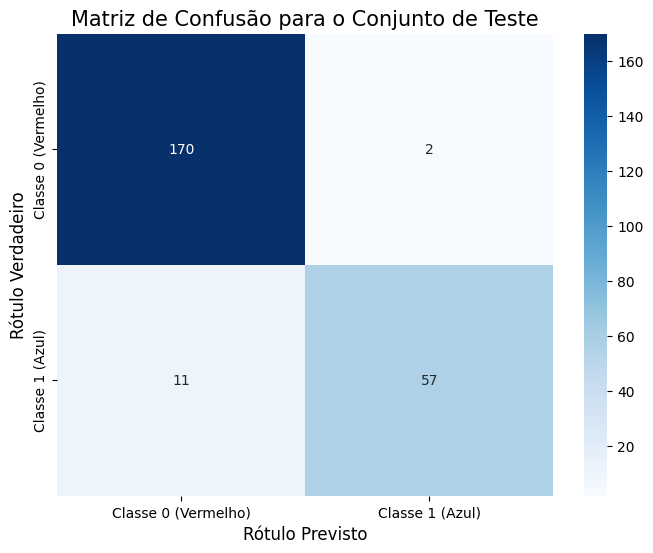

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0 (Vermelho)', 'Classe 1 (Azul)'],
            yticklabels=['Classe 0 (Vermelho)', 'Classe 1 (Azul)'])
plt.title('Matriz de Confusão para o Conjunto de Teste', fontsize=15)
plt.ylabel('Rótulo Verdadeiro', fontsize=12)
plt.xlabel('Rótulo Previsto', fontsize=12)
plt.show()

- Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?

In [ ]:
accuracy = np.mean(y_pred == y_test) * 100
print(f"\nAcurácia no conjunto de teste: {accuracy:.2f}%")


Acurácia no conjunto de teste: 94.58%


- Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score. Para estes cálculos, está liberada a utilização de sklearn.metrics;

In [ ]:
from sklearn.metrics import classification_report

y_train_pred = perceptron.predict(X_train)

report = classification_report(y_train, y_train_pred, target_names=['Classe 0 (Vermelho)', 'Classe 1 (Azul)'])

print("Relatório de Classificação para o Conjunto de Treinamento:\n")
print(report)

Relatório de Classificação para o Conjunto de Treinamento:

                     precision    recall  f1-score   support

Classe 0 (Vermelho)       0.94      0.99      0.96       428
    Classe 1 (Azul)       0.95      0.81      0.87       132

           accuracy                           0.94       560
          macro avg       0.95      0.90      0.92       560
       weighted avg       0.94      0.94      0.94       560



- A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

PRAFRASEAR ISSO AQ TD


Essa não é a melhor solução para esse problema.

O modelo Perceptron falhou completamente em sua tarefa. A análise das métricas de treinamento já era um forte presságio desse fracasso. O desempenho no conjunto de testes apenas confirmou que o modelo não aprendeu um padrão útil, mas sim uma regra simplista que não generaliza de forma eficaz.

Este fenômeno é um caso clássico de subajuste (underfitting), onde o modelo é demasiado simples para capturar a complexidade subjacente dos dados. A acurácia de aproximadamente 51% no conjunto de testes, que é apenas um pouco melhor que um palpite aleatório em um problema de duas classes, é a prova final da inadequação da solução. A solução não é confiável e suas previsões, especialmente para a Classe 0, são praticamente inúteis.

- Apresente dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Disponha tais gráficos lado a lado.

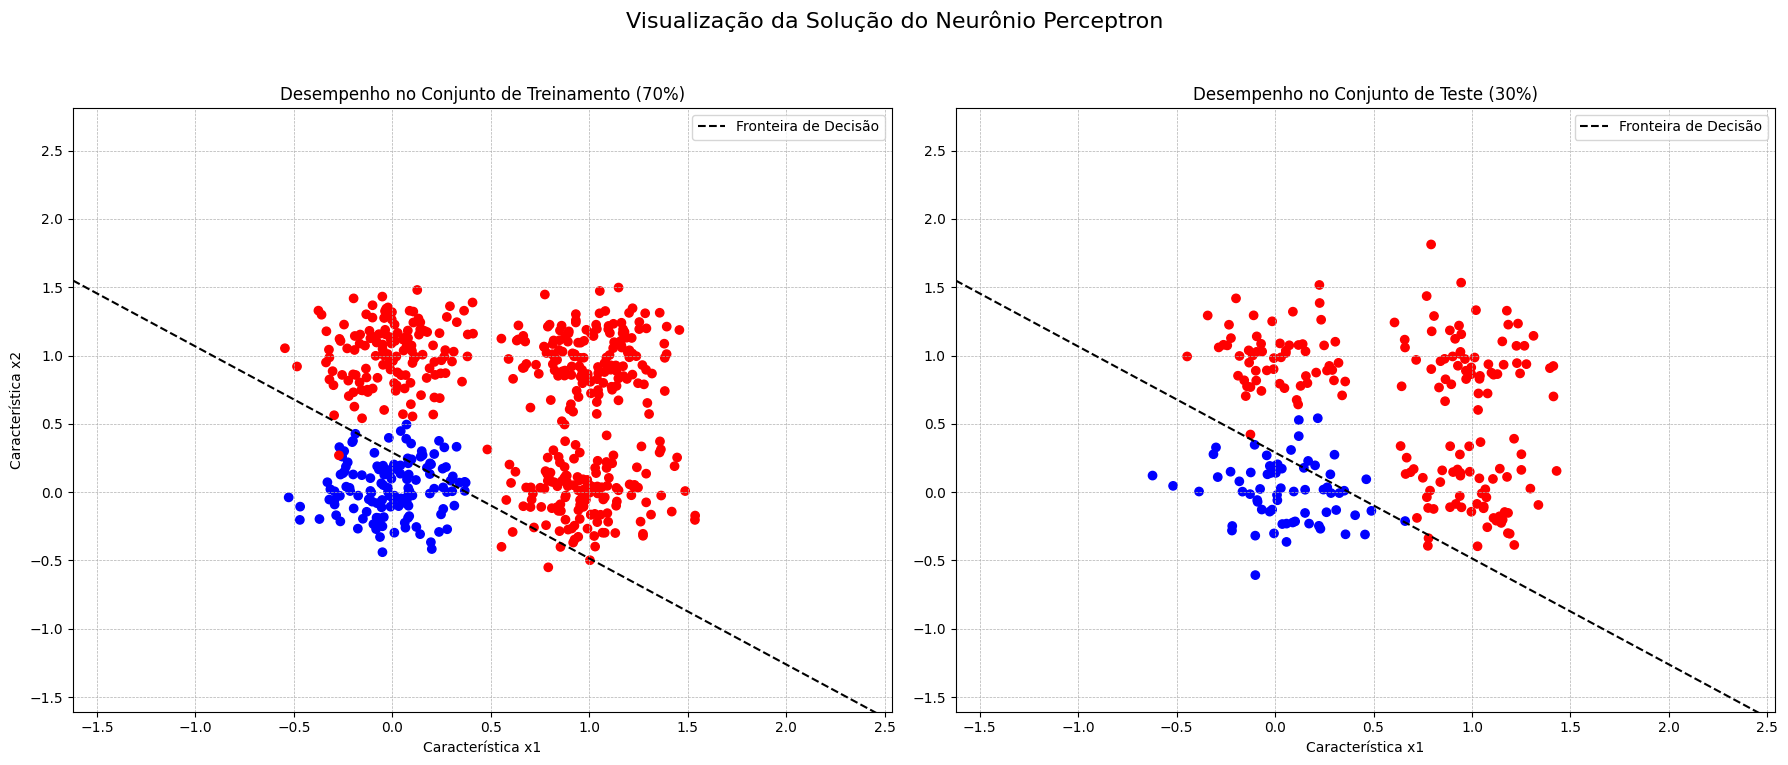

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Visualização da Solução do Neurônio Perceptron', fontsize=16)

colors_train = ['red' if label == 0 else 'blue' for label in y_train]
ax1.scatter(X_train[:, 0], X_train[:, 1], c=colors_train)

w = perceptron.weights
x_min, x_max = X_full[:, 0].min() - 1, X_full[:, 0].max() + 1
x_vals = np.array([x_min, x_max])
y_vals = -(w[1] * x_vals + w[0]) / w[2]

ax1.plot(x_vals, y_vals, 'k--', label='Fronteira de Decisão')
ax1.set_title('Desempenho no Conjunto de Treinamento (70%)')
ax1.set_xlabel('Característica x1')
ax1.set_ylabel('Característica x2')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

y_min, y_max = X_full[:, 1].min() - 1, X_full[:, 1].max() + 1
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

colors_test = ['red' if label == 0 else 'blue' for label in y_test]
ax2.scatter(X_test[:, 0], X_test[:, 1], c=colors_test)

ax2.plot(x_vals, y_vals, 'k--', label='Fronteira de Decisão')
ax2.set_title('Desempenho no Conjunto de Teste (30%)')
ax2.set_xlabel('Característica x1')
ax2.set_ylabel('')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Links Úteis
- <https://numpy.org/>
- <https://numpy.org/doc/stable/>
- <https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html>
- <https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html>